## Thành viên

| MSSV       | Tên             |
| ---------- | --------------- | 
| 22120400   | Trần Anh Tú     | 
| 22120407   | Hoàng Ngọc Tuệ  | 


---
# Phần 1: Tải và Kiểm tra Dữ liệu
## Yêu cầu:
- Tải và đọc toàn bộ tập dữ liệu `train.csv` và `test.csv`.
- In số dòng, tên cột của `train.csv`.
- In 5 dòng đầu tiên của `train.csv`.
---
## Đọc dữ liệu và các thư viện được sử dụng
* Các thư viện được sử dụng gồm `pandas`, `numpy`, `matplotlib`, `re`, và `seaborn`
* Hai file dữ liệu `train.csv` và `test.csv` được đọc vào dưới dạng DataFrame bằng thư viện `pandas`.
* Dữ liệu sau đó được in ra theo đúng yêu cầu đề bài

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

try:
    train_df = pd.read_csv('train.csv')
    print("Đọc file train.csv thành công!")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file train.csv.")

try:
    test_df = pd.read_csv('test.csv')
    print("Đọc file test.csv thành công!")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file test.csv.")


Đọc file train.csv thành công!
Đọc file test.csv thành công!


In [2]:
print("\nSố dòng trong train.csv:", len(train_df))
print("Tên các cột trong train.csv:", list(train_df.columns))
print("\n5 dòng đầu tiên của train.csv:")
print(train_df.head())


Số dòng trong train.csv: 1317
Tên các cột trong train.csv: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

5 dòng đầu tiên của train.csv:
        Make                                    Model    Price  Year  \
0  Ssangyong                               Rexton RX7   975000  2013   
1    Hyundai  Creta SX (O) 1.5 Petrol CVT [2020-2022]  1748999  2022   
2       Audi                     A4 2.0 TDI (143 bhp)  1150000  2012   
3    Hyundai        Grand i10 Magna AT 1.2 Kappa VTVT   549000  2018   
4    Hyundai                       Elite i20 Asta 1.2   675000  2017   

   Kilometer Fuel Type Transmission   Location   Color   Owner Seller Type  \
0      72000    Diesel    Automatic  Bangalore  Silver   First  Individual   
1       2670    Petrol    Automatic    Kolkata   White   First  Individual 

In [3]:
print("\nSố dòng trong test.csv:", len(test_df))
print("Tên các cột trong test.csv:", list(test_df.columns))
print("\n5 dòng đầu tiên của test.csv:")
print(test_df.head())


Số dòng trong test.csv: 330
Tên các cột trong test.csv: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

5 dòng đầu tiên của test.csv:
            Make                           Model    Price  Year  Kilometer  \
0           Ford      Endeavour Trend 2.2 4x2 AT  2350000  2016      75000   
1         Toyota  Urban Cruiser Premium Grade AT  1050000  2021       1910   
2  Maruti Suzuki                    Alto 800 Lxi   210000  2014      42505   
3          Honda                  City SV Diesel   550000  2014      85000   
4        Hyundai                       Eon Era +   290000  2018      70000   

  Fuel Type Transmission  Location   Color   Owner Seller Type   Engine  \
0    Diesel    Automatic    Mohali   White  Second  Individual  2198 cc   
1    Petrol    Automatic  Varanasi   White   Firs

In [4]:
# Kiểm tra tính nhất quán cột
if set(train_df.columns) == set(test_df.columns):
    print("\nCột của train.csv và test.csv giống nhau, dữ liệu nhất quán!")
else:
    print("\nCảnh báo: Cột của train.csv và test.csv không giống nhau!")


Cột của train.csv và test.csv giống nhau, dữ liệu nhất quán!


In [133]:
# Kiểm tra thống kê
print("\nThống kê train.csv:")
print(train_df[['Price', 'Year', 'Kilometer', 'Fuel Tank Capacity']].describe())
print("\nThống kê test.csv:")
print(test_df[['Price', 'Year', 'Kilometer', 'Fuel Tank Capacity']].describe())


Thống kê train.csv:
              Price         Year     Kilometer  Fuel Tank Capacity
count  1.317000e+03  1317.000000  1.317000e+03         1246.000000
mean   1.719387e+06  2016.381169  5.457236e+04           52.419583
std    2.407628e+06     3.416909  6.348731e+04           15.646960
min    4.900000e+04  1988.000000  0.000000e+00           15.000000
25%    4.849990e+05  2014.000000  2.900000e+04           40.250000
50%    8.250000e+05  2017.000000  4.942200e+04           50.000000
75%    1.950000e+06  2019.000000  7.200000e+04           63.000000
max    2.750000e+07  2022.000000  2.000000e+06          105.000000

Thống kê test.csv:
              Price         Year      Kilometer  Fuel Tank Capacity
count  3.300000e+02   330.000000     330.000000          311.000000
mean   1.605933e+06  2016.572727   52745.672727           51.093248
std    2.164080e+06     3.177980   31527.594343           14.370927
min    7.100100e+04  2004.000000    1102.000000           28.000000
25%    4.675000e


---
# Phần 2: Tiền xử lý Dữ liệu
## Yêu cầu:
- Chọn cột cho `X` để huấn luyện mô hình.
- Xử lý dữ liệu số + chữ: Loại bỏ chữ, giữ số.
- Xử lý dữ liệu phân loại: Mã hóa thành số (Label Encoding).
- Xử lý dữ liệu thiếu.
---
## Xử lý dữ liệu
* Lựa chọn các cột feature: `Year`, `Kilometer`, `Fuel Tank Capacity`, `Engine`, `Max Power`, `Owner`
* Dữ liệu được xử lý theo đúng yêu cầu đề bài

In [6]:
# --- Bước 2: Tiền xử lý dữ liệu ---
# Chọn cột cho biến độc lập X
feature_columns = ['Year', 'Kilometer', 'Fuel Tank Capacity', 'Engine', 'Max Power', 'Owner']
target_column = 'Price'

X_train = train_df[feature_columns].copy()
y_train = train_df[target_column].copy()
X_test = test_df[feature_columns].copy()
y_test = test_df[target_column].copy()

# In kết quả tiền xử lý
print("\nKết quả tiền xử lý dữ liệu:")
print("\nX_train:")
print(X_train.head())
print("\nX_test:")
print(X_test.head())


Kết quả tiền xử lý dữ liệu:

X_train:
   Year  Kilometer  Fuel Tank Capacity   Engine           Max Power   Owner
0  2013      72000                78.0  2696 cc  184 bhp @ 4000 rpm   First
1  2022       2670                50.0  1497 cc  113 bhp @ 6300 rpm   First
2  2012      40031                 NaN      NaN                 NaN  Second
3  2018      53000                43.0  1197 cc   81 bhp @ 6000 rpm  Second
4  2017      48591                45.0  1197 cc   82 bhp @ 6000 rpm   First

X_test:
   Year  Kilometer  Fuel Tank Capacity   Engine           Max Power   Owner
0  2016      75000                80.0  2198 cc  158 bhp @ 3200 rpm  Second
1  2021       1910                48.0  1462 cc  103 bhp @ 6000 rpm   First
2  2014      42505                35.0   796 cc   47 bhp @ 6000 rpm   First
3  2014      85000                40.0  1498 cc   99 bhp @ 3600 rpm   First
4  2018      70000                32.0   814 cc   55 bhp @ 5500 rpm   First


In [128]:
# Xử lý dữ liệu số và vừa chữ vừa số
numeric_columns = ['Year', 'Kilometer', 'Fuel Tank Capacity']
numeric_means = {}
for col in numeric_columns:
    numeric_means[col] = X_train[col].mean()
    X_train[col] = X_train[col].fillna(numeric_means[col])
    X_test[col] = X_test[col].fillna(numeric_means[col])

def first_num(text):
    if pd.isna(text):
        return np.nan
    try:
        # Tìm số thực hoặc nguyên đầu tiên trong chuỗi
        match = re.search(r'(\d+(\.\d+)?)', str(text))
        if match:
            return float(match.group(1))
        else:
            return np.nan
    except:
        return np.nan

X_train['Engine'] = X_train['Engine'].apply(first_num)
X_test['Engine'] = X_test['Engine'].apply(first_num)
engine_mean = X_train['Engine'].mean()
print(engine_mean)
X_train['Engine'] = X_train['Engine'].fillna(engine_mean)
X_test['Engine'] = X_test['Engine'].fillna(engine_mean)



X_train['Max Power'] = X_train['Max Power'].apply(first_num)
X_test['Max Power'] = X_test['Max Power'].apply(first_num)
power_mean = X_train['Max Power'].mean()
print(power_mean)
X_train['Max Power'] = X_train['Max Power'].fillna(power_mean)
X_test['Max Power'] = X_test['Max Power'].fillna(power_mean)
print("\nX_train:")
print(X_train.head())
print("\nX_test:")
print(X_test.head())

1708.8164556962029
130.26558544303796

X_train:
   Year  Kilometer  Fuel Tank Capacity       Engine   Max Power  Owner
0  2013      72000           78.000000  2696.000000  184.000000      0
1  2022       2670           50.000000  1497.000000  113.000000      0
2  2012      40031           52.419583  1708.816456  130.265585      1
3  2018      53000           43.000000  1197.000000   81.000000      1
4  2017      48591           45.000000  1197.000000   82.000000      0

X_test:
   Year  Kilometer  Fuel Tank Capacity  Engine  Max Power  Owner
0  2016      75000                80.0  2198.0      158.0    1.0
1  2021       1910                48.0  1462.0      103.0    0.0
2  2014      42505                35.0   796.0       47.0    0.0
3  2014      85000                40.0  1498.0       99.0    0.0
4  2018      70000                32.0   814.0       55.0    0.0


In [8]:
# Xử lý dữ liệu loại
categorical_columns = ['Owner']
categorical_modes = {}
mappings = {}
for col in categorical_columns:
    categorical_modes[col] = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(categorical_modes[col])
    X_test[col] = X_test[col].fillna(categorical_modes[col])
    unique_values = X_train[col].unique()
    mappings[col] = {val: idx for idx, val in enumerate(unique_values)}

for col in categorical_columns:
    X_train[col] = X_train[col].map(mappings[col])
    X_test[col] = X_test[col].map(mappings[col]).fillna(len(mappings[col]))

print("\nX_train:")
print(X_train.head())
print("\nX_test:")
print(X_test.head())


X_train:
   Year  Kilometer  Fuel Tank Capacity       Engine   Max Power  Owner
0  2013      72000           78.000000  2696.000000  184.000000      0
1  2022       2670           50.000000  1497.000000  113.000000      0
2  2012      40031           52.419583  1708.816456  130.265585      1
3  2018      53000           43.000000  1197.000000   81.000000      1
4  2017      48591           45.000000  1197.000000   82.000000      0

X_test:
   Year  Kilometer  Fuel Tank Capacity  Engine  Max Power  Owner
0  2016      75000                80.0  2198.0      158.0    1.0
1  2021       1910                48.0  1462.0      103.0    0.0
2  2014      42505                35.0   796.0       47.0    0.0
3  2014      85000                40.0  1498.0       99.0    0.0
4  2018      70000                32.0   814.0       55.0    0.0



---
## Đồ thị cho biểu thị mối liên hệ của các thuộc tính được chọn với Price

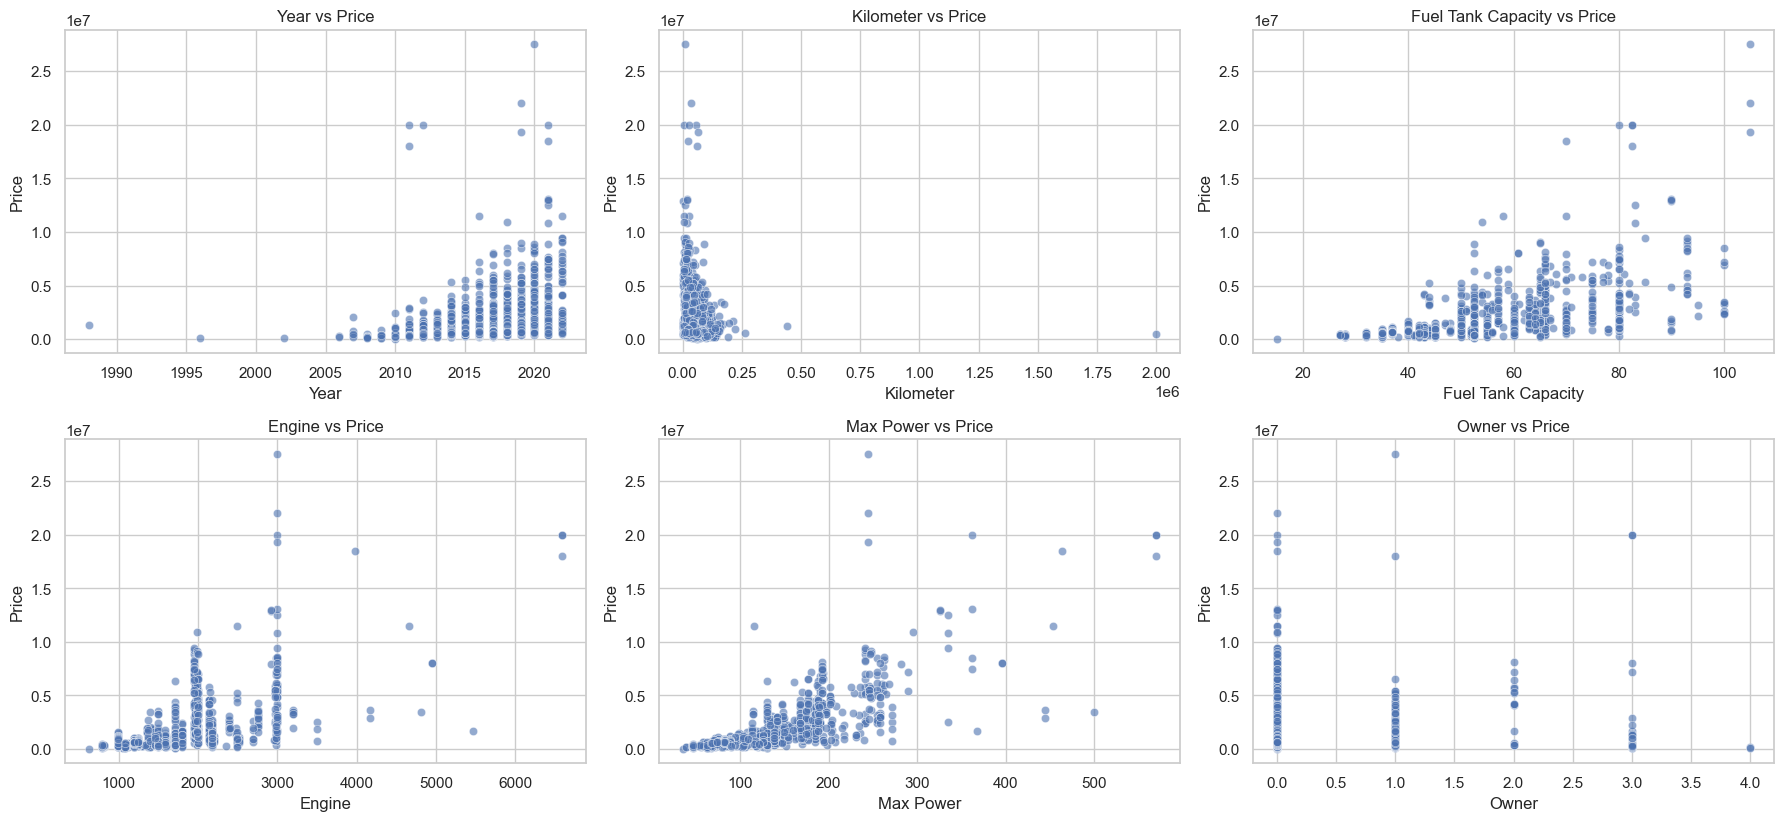

In [9]:
# Biểu diễn mối liên quan giữa các cột feature với price
train_show = pd.concat([X_train, y_train], axis=1)

# Cài đặt kiểu hiển thị đẹp
sns.set(style="whitegrid")

# Tạo figure với các subplot
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Vẽ scatter plot cho từng feature
for i, feature in enumerate(feature_columns):
    ax = axes[i]
    sns.scatterplot(x=feature, y=target_column, data=train_show, ax=ax, alpha=0.6)
    ax.set_title(f"{feature} vs {target_column}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')

# Ẩn các subplot thừa nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


---
# Phần 3:  Mô hình Tuyến tính
### Yêu cầu:
- Định nghĩa cột và 4 công thức hồi quy tuyến tính.
- Huấn luyện mô hình không dùng `sklearn`.
- Tính MSE trên `train.csv` và file bất kỳ (`test.csv`).
- Báo cáo lý do chọn cột và công thức.
---
## Mô hình Linear Regression

Class `LinearRegression` được xây dựng để thực hiện hồi quy tuyến tính, với khả năng xử lý các đặc trưng đầu vào linh hoạt dựa trên biến `formula_type`.

### Các thành phần chính:

* `train(X, y)`: Huấn luyện mô hình với tập dữ liệu đầu vào. Hệ số hồi quy được tính bằng:

  $$
  \theta = (X^TX)^{-1}X^Ty
  $$

  Trong đó `X` được chuẩn hoá (z-score normalization) để giúp quá trình học ổn định hơn. Các đặc trưng cũng có thể được biến đổi tùy theo `formula_type`.

* `predict(X)`: Dự đoán đầu ra từ dữ liệu đầu vào sau khi đã chuẩn hoá và áp dụng các công thức biến đổi tương tự như khi huấn luyện.

* `get_parameters() / set_parameters()`: Lấy hoặc gán lại toàn bộ tham số mô hình (gồm hệ số và hệ số chệch), hỗ trợ cho quá trình tổng hợp mô hình trong Federated Learning.

* `formula_type`: Điều khiển cách biến đổi đặc trưng đầu vào. Ví dụ:

  * `formula_type = 1`: Mô hình sử dụng trực tiếp các đặc trưng đầu vào mà không biến đổi:
  
  $$
  y = a_1 \cdot \text{Year} + a_2 \cdot \text{Kilometer} + a_3 \cdot \text{Engine} + a_4 \cdot \text{Max Power} + a_5 \cdot \text{Fuel Tank Capacity} + a_6 \cdot \text{Owner} + b
  $$

  * `formula_type = 2`: Chỉ các cột `Year`, `Engine`, `Max Power`, `Fuel Tank Capacity` được bình phương lên, các cột còn lại giữ nguyên.

  $$
  y = a_1 \cdot (\text{Year})^2 + a_2 \cdot (\text{Kilometer}) + a_3 \cdot (\text{Engine})^2 + a_4 \cdot (\text{Max Power})^2 + a_5 \cdot (\text{Fuel Tank Capacity})^2 + a_6 \cdot \text{Owner} + b
  $$

  * `formula_type = 3`: Đây là công thức đơn giản hơn, chỉ giữ lại các đặc trưng kỹ thuật của xe.
  
  $$
  y = a_1 \cdot \text{Year} + a_2 \cdot \text{Engine} + a_3 \cdot \text{Max Power} + a_4 \cdot \text{Fuel Tank Capacity} + b
  $$

  * `formula_type = 4`: Tạo 3 đặc trưng tương tác giữa `Max Power`, `Engine`, và `Fuel Tank Capacity`
    * `Power_x_cc` = Max Power × Engine
    * `Power_x_Fuel` = Max Power × Fuel Tank Capacity
    * `cc_x_Fuel` = Engine × Fuel Tank Capacity
  
  $$
  y = a_1 \cdot \text{Year} + a_2 \cdot \text{Kilometer} + a_3 \cdot \text{Owner} + a_4 \cdot (\text{Power\_x\_cc}) + a_5 \cdot (\text{Power\_x\_Fuel}) + a_6 \cdot (\text{cc\_x\_Fuel}) + b
  $$


Dưới đây là phiên bản đã cập nhật phần mô tả các công thức hồi quy trong Markdown, phản ánh đúng logic mới trong đoạn code `formula_type` bạn vừa cung cấp:

---

## 📐 Các công thức hồi quy theo `formula_type` (Cập nhật)

Tùy vào giá trị `formula_type`, mô hình sẽ biến đổi dữ liệu đầu vào theo những cách khác nhau trước khi huấn luyện. Cụ thể:

---

### ✅ `formula_type = 1` – **Công thức cơ bản**

Sử dụng toàn bộ các đặc trưng đầu vào gốc, không biến đổi:

$$
y = a_1 \cdot \text{Year} + a_2 \cdot \text{Kilometer} + a_3 \cdot \text{Engine} + a_4 \cdot \text{Max Power} + a_5 \cdot \text{Fuel Tank Capacity} + a_6 \cdot \text{Owner} + b
$$

---

### ✅ `formula_type = 2` – **Bình phương toàn bộ các đặc trưng kỹ thuật**

Tất cả các đặc trưng dạng số đều được bình phương:



> Chỉ các cột `Year`, `Engine`, `Max Power`, `Fuel Tank Capacity` được biến đổi, các cột còn lại giữ nguyên.

---

### ✅ `formula_type = 3` – **Loại bỏ một số đặc trưng**

Hai cột `Owner` và `Kilometer` bị loại bỏ:


> Đây là công thức đơn giản hơn, chỉ giữ lại các đặc trưng kỹ thuật của xe.

---

### ✅ `formula_type = 4` – **Tạo tương tác giữa các đặc trưng kỹ thuật**

Tạo 3 đặc trưng tương tác giữa `Max Power`, `Engine`, và `Fuel Tank Capacity`:

* `Power_x_cc` = Max Power × Engine
* `Power_x_Fuel` = Max Power × Fuel Tank Capacity
* `cc_x_Fuel` = Engine × Fuel Tank Capacity

Sau đó, các cột gốc liên quan được loại bỏ. Công thức:


> Đây là công thức phức tạp nhất, dùng tương tác giữa các đặc trưng để tăng khả năng mô hình hóa phi tuyến tính.

---

📌 **Lưu ý:**

* Tất cả dữ liệu đầu vào sau khi biến đổi đều được chuẩn hóa (z-score) để đảm bảo huấn luyện ổn định.
* Các đặc trưng bị loại bỏ hoặc thay thế sẽ không ảnh hưởng đến quá trình chuẩn hóa nếu được xử lý đúng.

Nếu bạn cần mình cập nhật thêm biểu đồ hoặc ví dụ minh họa trực tiếp, mình có thể hỗ trợ.


In [189]:
# --- Bước 3: Mô hình Tuyến tính ---
# Từ các thuộc tính đã được xử lý ở phần 2 tiến hành triển khai linear regressionregression
def calculate_mse(y_true, y_pred, normalize=True):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    if normalize:
        y_mean = np.mean(y_true)
        y_std = np.std(y_true)
        if y_std == 0:
            y_std = 1  

        y_true = (y_true - y_mean) / y_std
        y_pred = (y_pred - y_mean) / y_std 

    mse = np.mean((y_true - y_pred) ** 2)
    return mse

class LinearRegression:
    def __init__(self, formula_type):
        self.coefficients = None
        self.intercept = None
        self.means = None
        self.stds = None
        self.formula_type = formula_type
        self.noise_coeff = None
        self.noise_inter = None
        self.sensitivity = None
    
    def train(self, X, y, means=None, stds=None):
        try:
            X = X.copy()

            # Áp dụng công thức tùy theo formula_type
            if self.formula_type == 2:
                X['Year'] = X['Year'] ** 2
                X['Fuel Tank Capacity'] = X['Fuel Tank Capacity'] ** 2
                X['Max Power'] = X['Max Power']**2
                X['Engine'] = X['Engine'] ** 2
            elif self.formula_type == 3:
                X.drop(columns=['Owner'], inplace=True)
                X.drop(columns=['Kilometer'], inplace=True)
            elif self.formula_type == 4:
                X['Power_x_cc'] = X['Max Power'] * X['Engine']
                X['Power_x_Fuel'] = X['Max Power'] * X['Fuel Tank Capacity']
                X['cc_x_Fuel'] = X['Engine'] * X['Fuel Tank Capacity']
                X.drop(columns=['Engine', 'Max Power', 'Fuel Tank Capacity'], inplace=True)

            if means is not None and stds is not None:
                self.means = means
                self.stds = stds
            else:   
                self.means = X.mean()
                self.stds = X.std().replace(0, 1)
            # Chuẩn hóa dữ liệu
            X_norm = (X - self.means) / self.stds
            # Thêm cột bias
            X_design = np.column_stack([np.ones(X_norm.shape[0]), X_norm])

            # Tính hệ số hồi quy
            X_transpose = X_design.T
            coefficients = np.linalg.inv(X_transpose @ X_design) @ X_transpose @ y
            self.intercept = coefficients[0]
            self.coefficients = coefficients[1:]

            # Tính sensitivity của dữ liệu (phục vụ cho DP)
            XTX_inv = np.linalg.pinv(X_transpose @ X_design)
            self.sensitivity = np.sqrt(np.sum(XTX_inv ** 2)) * (np.max(y) - np.min(y))
        except Exception as e:
            print("Lỗi trong train:", e)
            return None

    def predict(self, X):
        try:
            X = X.copy()

            # Áp dụng công thức tương tự như khi train
            if self.formula_type == 2:
                X['Year'] = X['Year'] ** 2
                X['Fuel Tank Capacity'] = X['Fuel Tank Capacity'] ** 2
                X['Max Power'] = X['Max Power']**2
                X['Engine'] = X['Engine'] ** 2
            elif self.formula_type == 3:
                X.drop(columns=['Owner'], inplace=True)
                X.drop(columns=['Kilometer'], inplace=True)
            elif self.formula_type == 4:
                X['Power_x_cc'] = X['Max Power'] * X['Engine']
                X['Power_x_Fuel'] = X['Max Power'] * X['Fuel Tank Capacity']
                X['cc_x_Fuel'] = X['Engine'] * X['Fuel Tank Capacity']
                X.drop(columns=['Engine', 'Max Power', 'Fuel Tank Capacity'], inplace=True)

            # Chuẩn hóa
            X_norm = (X - self.means) / self.stds
            X_design = np.column_stack([np.ones(X_norm.shape[0]), X_norm])

            # Dự đoán
            if self.noise_coeff is not None and self.noise_inter is not None:
                return X_design @ np.insert(self.coefficients + self.noise_coeff, 0, self.intercept + self.noise_inter)
            
            return X_design @ np.insert(self.coefficients, 0, self.intercept)

        except Exception as e:
            print("Lỗi trong predict:", e)
            return None
        
    def apply_laplace_mechanism(self, epsilon):
        scale = self.sensitivity / epsilon
        if self.coefficients is not None:
            noise_coef = np.random.laplace(loc=0.0, scale=scale, size=self.coefficients.shape)
            self.noise_coeff = noise_coef

        if self.intercept is not None:
            noise_intercept = np.random.laplace(loc=0.0, scale=scale)
            self.noise_inter = noise_intercept
        
    def get_parameters(self):
        if self.noise_coeff is not None and self.noise_inter is not None:
            return  np.insert(self.coefficients + self.noise_coeff, 0, self.intercept + self.noise_inter)
        return np.insert(self.coefficients, 0, self.intercept)

    def set_parameters(self, params):
        self.intercept = params[0]
        self.coefficients = params[1:]
        

print("\n--- Kết quả huấn luyện và đánh giá ---")
for formula_type in range(1, 5):
    print(f"\nĐang thử với công thức {formula_type}:")

    model = LinearRegression(formula_type)
    model.train(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = calculate_mse(y_train, y_train_pred)
    mse_test = calculate_mse(y_test, y_test_pred)

    print(f"MSE trên train.csv: {mse_train:.3f}")
    print(f"MSE trên test.csv:  {mse_test:.3f}")



--- Kết quả huấn luyện và đánh giá ---

Đang thử với công thức 1:
MSE trên train.csv: 0.360
MSE trên test.csv:  0.296

Đang thử với công thức 2:
MSE trên train.csv: 0.315
MSE trên test.csv:  0.217

Đang thử với công thức 3:
MSE trên train.csv: 0.364
MSE trên test.csv:  0.299

Đang thử với công thức 4:
MSE trên train.csv: 0.318
MSE trên test.csv:  0.277



---
## Đọc và tính toán độ chính xác trên một file
* Hàm nhân vào 2 tham số là file_path: đường dẫn tời file dữ liệu và formula_type: công thức hồi quy tuyến tính muốn sử dụng.
* Hàm sẽ trả về MSE trên file đó dựa trên công thức hồi quy đã được sử dụng.

In [123]:
def evaluate_on_csv(file_path, formula_type):
    try:
        df = pd.read_csv(file_path)
        X = df[feature_columns].copy()
        y = df['Price'].copy()
        
        for col in ['Year', 'Kilometer', 'Fuel Tank Capacity']:
            X[col] = X[col].fillna(numeric_means.get(col, X[col].mean()))

        X['Engine'] = X['Engine'].apply(first_num)
        e_mean = X['Engine'].mean()
        X['Engine'] = X['Engine'].fillna(e_mean)

        X['Max Power'] = X['Max Power'].apply(first_num)
        p_mean = X['Max Power'].mean()
        X['Max Power'] = X['Max Power'].fillna(p_mean)

        for col in ['Owner']:
            X[col] = X[col].fillna(categorical_modes.get(col))
            X[col] = X[col].map(mappings.get(col, {})).fillna(len(mappings.get(col, {})))

        model = LinearRegression(formula_type)
        model.train(X, y)
        y_pred = model.predict(X)
        mse = calculate_mse(y.values, y_pred)
        print(f"MSE trên file {file_path}: {mse:.3f}")
        return mse
    except Exception as e:
        print(f"Lỗi khi đánh giá file {file_path}: {e}")
        return None

print("\n--- Đánh giá trên file test.csv ---")
mse = evaluate_on_csv('test.csv', 1)


--- Đánh giá trên file test.csv ---
MSE trên file test.csv: 0.276



---

## Huấn luyện mô hình với **Differential Privacy**

Trong phần này, mô hình hồi quy tuyến tính (`LinearRegression`) được huấn luyện theo **công thức 4**, sau đó áp dụng **Laplace Mechanism** để đảm bảo quyền riêng tư đầu ra.

### Cơ chế hoạt động:

* **Laplace Mechanism** được thêm vào các tham số mô hình (hệ số và hệ số chệch) sau khi huấn luyện.
* Độ nhiễu phụ thuộc vào **tham số epsilon (𝜀)**:

  * **Epsilon nhỏ** → nhiễu lớn → bảo mật cao nhưng độ chính xác thấp.
  * **Epsilon lớn** → nhiễu nhỏ → độ chính xác cao nhưng mức độ riêng tư giảm.

### Thử nghiệm và đánh giá:
* **MSE (Mean Squared Error)** được sử dụng để đo sai số trên cả `train.csv` và `test.csv`.
Mô hình được đánh giá với 3 mức độ riêng tư:
* `𝜀 = 0.1` (rất riêng tư)
* `𝜀 = 5.0` (cân bằng)
* `𝜀 = 50.0` (gần như không riêng tư)
* Quan sát sự thay đổi của MSE khi epsilon tăng sẽ cho thấy sự đánh đổi giữa **độ chính xác** và **mức độ riêng tư**.
* Kết quả được so sánh với mô hình **không sử dụng DP** (tức không thêm nhiễu).

In [124]:
# Phần 3.3: Differential Privacy
# Huấn luyện và đánh giá với DP
epsilons = [0.1, 5.0, 50.0]

print("\n--- Kết quả với Differential Privacy (Công thức 4) ---")
for epsilon in epsilons:
    # Thêm noise vào output
    model = LinearRegression(4)
    model.train(X_train, y_train)      
    model.apply_laplace_mechanism(epsilon)
    
    output_train = model.predict(X_train)
    output_test = model.predict(X_test)

    mse_train = calculate_mse(y_train, output_train)
    mse_test = calculate_mse(y_test, output_test)
    
    print(f"\nEpsilon = {epsilon}:")
    print(f"MSE trên train.csv: {mse_train:.3f}")
    print(f"MSE trên test.csv: {mse_test:.3f}")

# Không DP

model = LinearRegression(4)
model.train(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = calculate_mse(y_train, y_train_pred)
mse_test = calculate_mse(y_test, y_test_pred)
print("\nKhông DP:")
print(f"MSE trên train.csv: {mse_train:.3f}")
print(f"MSE trên test.csv: {mse_test:.3f}")


--- Kết quả với Differential Privacy (Công thức 4) ---

Epsilon = 0.1:
MSE trên train.csv: 30.415
MSE trên test.csv: 29.242

Epsilon = 5.0:
MSE trên train.csv: 0.391
MSE trên test.csv: 0.334

Epsilon = 50.0:
MSE trên train.csv: 0.330
MSE trên test.csv: 0.272

Không DP:
MSE trên train.csv: 0.330
MSE trên test.csv: 0.273


## Triển khai cho mô hình Federated learning
## Federated Learning – Mô hình học liên kết phân tán
Federated Learning (FL) là một phương pháp học máy trong đó quá trình huấn luyện mô hình được thực hiện trên nhiều thiết bị hoặc máy khách (clients) thay vì tập trung toàn bộ dữ liệu tại một máy chủ trung tâm. Dữ liệu không cần được chia sẻ ra ngoài, giúp tăng cường quyền riêng tư và bảo mật.

### Các bước chính trong mô hình:

1. **Khởi tạo server (máy chủ):**

   * Server được khởi tạo với một mô hình học máy (Linear Regression) với một công thức củ thể (ở đây là công thức 4).
   * Server tiến hành huấn luyện ban đầu với dữ liệu công khai để tính toán các tham số chuẩn hóa (mean, std).

2. **Khởi tạo client (máy khách):**
   
   * Client sẽ có cùng cấu trúc Model với server (Linear Regression với công thức 4) 
   * Mỗi client sẽ nhận tham số chuẩn hóa từ server.
   * Tiến hành huấn luyện mô hình với dữ liệu cục bộ của mình (local training).
   * Trước khi gửi mô hình về server, client thêm nhiễu (noise) bằng **Laplace Mechanism** để đảm bảo **differential privacy**.

3. **Tổng hợp tại server:**

   * Server thu thập các mô hình từ client.
   * Áp dụng **Federated Averaging (FedAvg)**: trung bình hóa các tham số của mô hình từ client.
   * Cập nhật mô hình toàn cục (global model) với kết quả trung bình này.

### Bảo mật và quyền riêng tư:

* Cơ chế thêm nhiễu Laplace đảm bảo rằng thông tin nhạy cảm từ client không thể bị suy luận ngược lại từ mô hình đã huấn luyện.

### Đánh giá hiệu quả:

* Độ chính xác của mô hình được đánh giá thông qua hàm mất mát MSE (Mean Squared Error).
* So sánh MSE giữa mô hình ban đầu, mô hình client và mô hình sau tổng hợp giúp kiểm tra hiệu quả của quy trình FL.

In [125]:
class Federated_Server:
    def __init__(self, formula_type):
        self.server_model = LinearRegression(formula_type)
        self.client_ids = []

    def init_train(self, X, y):
        self.server_model.train(X,y)

    def federated_averaging(self, client_models):
        param_list = []

        for model in client_models:
            params = model.get_parameters()
            param_list.append(params)

        # Trung bình các tham số từ client
        avg_params = np.mean(param_list, axis=0)
        # Gán tham số trung bình lại cho mô hình server
        self.server_model.set_parameters(avg_params)
    
    def share_mean_std(self):
        return self.server_model.means, self.server_model.stds
     
class Federated_Client:
    def __init__(self, id, formula_type):
        self.client_id = id
        self.client_model = LinearRegression(formula_type)

    def local_train(self, X, y, means = None, stds = None):
        self.client_model.train(X,y,means, stds)

# Bước 1 khởi tạo Federated Server với dữ liệu mẫu để thực hiện initial train
My_server = Federated_Server(4)
My_server.init_train(X_train, y_train)
shared_means, shared_stds = My_server.share_mean_std()
# Trước khi chia sẻ mean và std của dữ liệu thì server có thểm thêm noise vào để đảm bảo tính riêng tư. 
# Tuy nhiên ở đây giả sử dữ liệu được sử dụng cho server là dữ liệu public hoặc không quan trọng tính riêng tư.
server_pred_price_init = My_server.server_model.predict(X_train)
server_mse_init = calculate_mse(y_train, server_pred_price_init)

test_model = LinearRegression(4)
test_model.train(X_train, y_train)
test_pred = test_model.predict(X_train)
test_mse = calculate_mse(test_pred, y_train)
print(f"mse của server khi khởi tạo: {server_mse_init:.3f}")

# Bước 2 khởi tạo các client (các client lấy các tham số initial của server) tiến hành train model với dữ liệu local
Client_1 = Federated_Client(1, 4)
Client_2 = Federated_Client(2, 4)
Client_1.local_train(X_train, y_train, shared_means, shared_stds)
Client_2.local_train(X_test, y_test, shared_means, shared_stds)

client1_pred_price = Client_1.client_model.predict(X_train)
client1_mse = calculate_mse(y_train, client1_pred_price)
print(f"\nmse của client 1 trước khi thêm noise:{client1_mse:.3f}")

client2_pred_price = Client_2.client_model.predict(X_test)
client2_mse = calculate_mse(y_test, client2_pred_price)
print(f"\nmse của client 2 trước khi thêm noise:{client2_mse:.3f}")
# Bước 3 client gửi lại kết quả sau khi train (kết quả đó được thêm noise trước khi gửi)
Client_1_epsilon = 3.0
Client_1.client_model.apply_laplace_mechanism(Client_1_epsilon)
Client_2_epsilon = 4.0 
Client_2.client_model.apply_laplace_mechanism(Client_2_epsilon)
Client_models = [Client_1.client_model, Client_2.client_model]
# Bước 4 server tổng hộp lại các dữ liệu và update mô hình.
My_server.federated_averaging(Client_models)
server_pred_price_final = My_server.server_model.predict(X_train)
server_mse_final = calculate_mse(y_train, server_pred_price_final)
print(f"\nmse của server sau khi tổng hợp và update từ client:{server_mse_final:.3f}")

mse của server khi khởi tạo: 0.330

mse của client 1 trước khi thêm noise:0.330

mse của client 2 trước khi thêm noise:0.249

mse của server sau khi tổng hợp và update từ client:0.483
